## Redes Neuronales Preentrenadas

https://keras.io/api/applications/

Para este ejemplo vamos a usar la arquitectura de un modelo **VGG16**.

In [ ]:
# Utilizar arquitecturas prediseñadas...

# Transfer learning.


# Juntar lo visto. Para hacer el dataset de los gatos con transfer learning...
# hacerlo con colab.

### Padding

**Padding** (relleno) es el proceso de agregar capas de ceros a nuestras imágenes de entrada para evitar que el tamaño de la imagen reduzca mucho de tamaño cuando pasa por una capa convolucional.

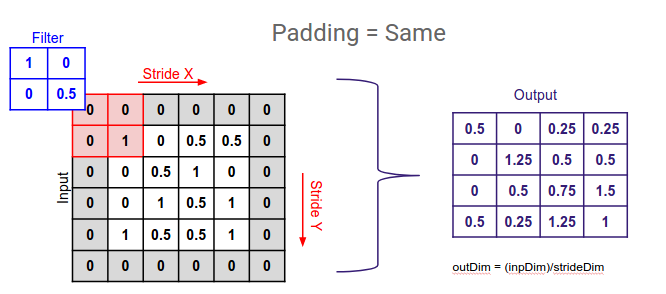

En la imagen anterior, vemos que se aplica una capa convolucional, que por lo general deberia reducir el tamaño de la imagen, pero agregando una capa de 0 alrededor de la imagen vemos que no se modifica el tamaño.

In [1]:
import numpy as np

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt

import tensorflow as tf # Para ver la versión
import keras # Para ver la versión

# dataset
from keras.datasets.cifar10 import load_data

from keras import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Input
from keras.layers import Flatten
from keras.layers import Dropout

from keras.utils import to_categorical

import sklearn # Para ver la versión

from sklearn.metrics import confusion_matrix

/Users/federicollanes/miniforge3/envs/fede/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"tensorflow=={tf.__version__}")
print(f"keras=={keras.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

# Unidades de procesamiento
print("\nUnidades de procesamiento:")
for device in tf.config.list_physical_devices():
    print(f"\t- {device.name}")

numpy==1.26.4
matplotlib==3.4.2
tensorflow==2.17.0
keras==3.5.0
scikit-learn==1.5.1

Unidades de procesamiento:
	- /physical_device:CPU:0


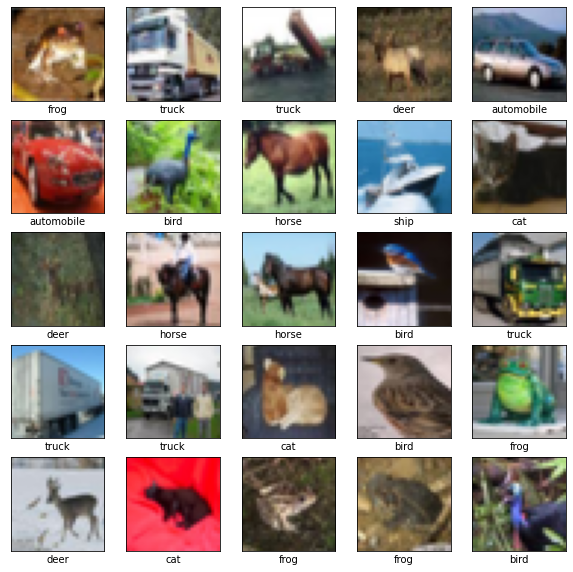

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

X_train, X_test = X_train/255.0, X_test/255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (10, 10))

for i in range(25):
    
    plt.subplot(5, 5, i + 1)
    plt.xticks(list())
    plt.yticks(list())
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)

    plt.xlabel(class_names[y_train[i][0]])
    
plt.show()

In [4]:
print(X_train.shape)

(50000, 32, 32, 3)


In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
# Reducimos el tamaño de los datos

X_train, y_train = X_train[:1_000], y_train[:1_000]

In [7]:
X_train.shape

(1000, 32, 32, 3)

_**Documentacion:** https://keras.io/api/applications/vgg/_

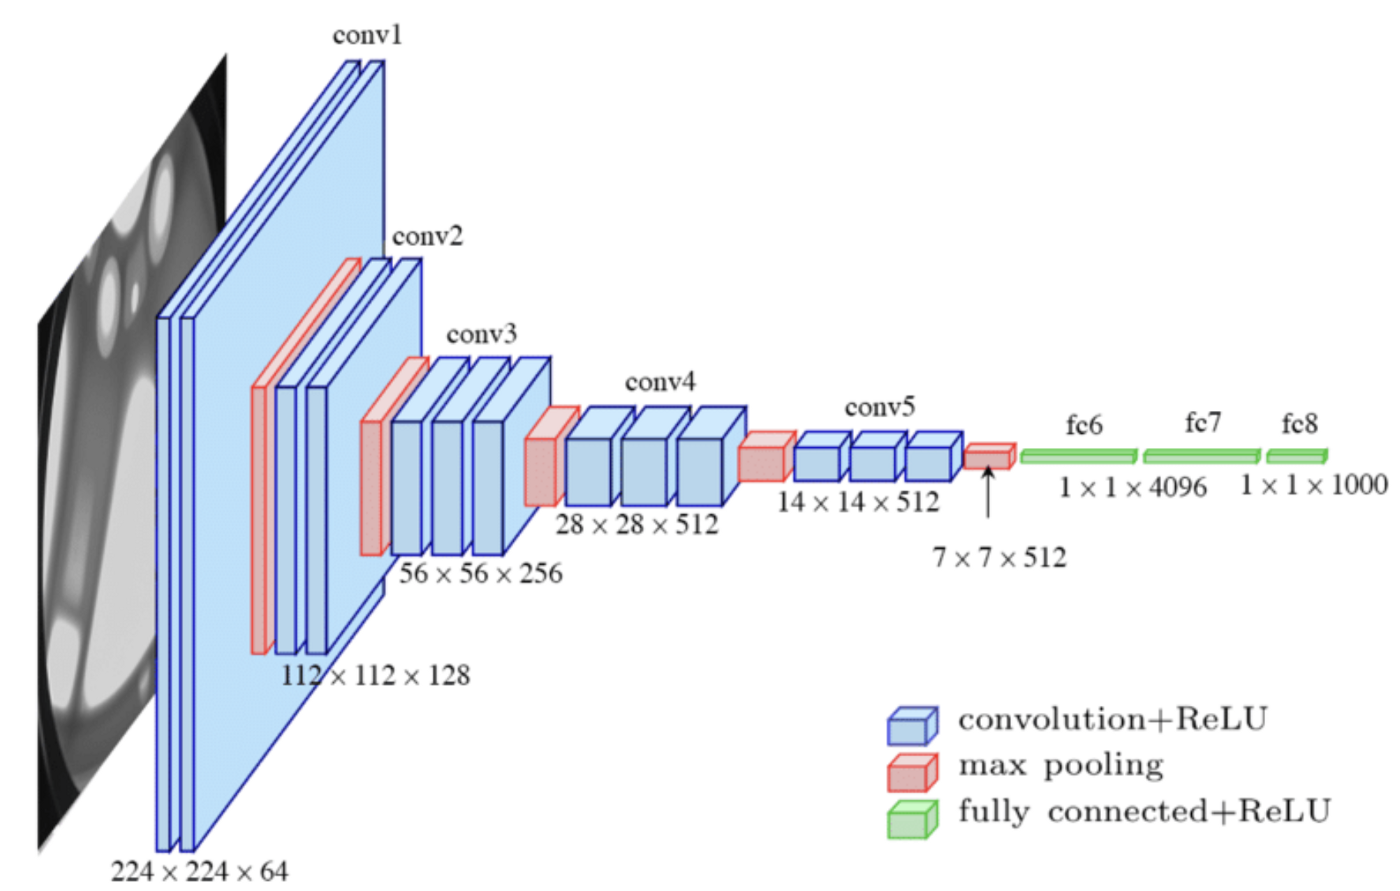

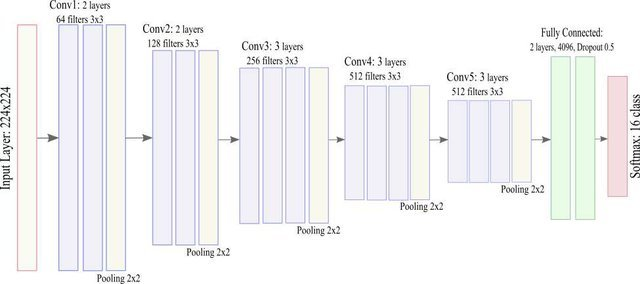

In [ ]:
# Modelo VGG16

input_shape = (32, 32, 3)

model = Sequential()

model.add(Input(shape = input_shape))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 4096, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 4096, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 10, activation = "softmax"))

model.summary()

In [45]:
from tensorflow.keras.applications import VGG16

model = Sequential()

base_model = VGG16(weights = "imagenet",
              include_top = False,
              input_shape = (32, 32, 3))

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [47]:
y_test_cat.shape

(10000, 10)

In [ ]:
model.compile(optimizer = "adam",
              loss      = "categorical_crossentropy",
              metrics   = ["accuracy"])

history = model.fit(x = X_train, y = y_train_cat,
                    validation_data = (X_test, y_test_cat), epochs = 10)

In [ ]:
history.history

In [ ]:
def plot_history(history):
    
    accuracy     = history.history["accuracy"]
    loss         = history.history["loss"]

    val_accuracy = history.history["val_accuracy"]
    val_loss     = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    # Plot Accuracy
    plt.plot(epochs,     accuracy, "r--", label = "Train accuracy"  )
    plt.plot(epochs, val_accuracy,  "b", label = "Validation accuracy")
    
    plt.title("Training and validation accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

    # Plot Loss
    plt.plot(epochs, loss, "r--", label = "Train loss" )
    plt.plot(epochs, val_loss ,  "b", label = "Validation loss" )
    
    plt.title("Training and validation loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

In [ ]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)
print ("Test Accuracy:", test_accuracy)

In [ ]:
# También podemos tener un modelo preentrenado y agregarle más capas

model_vgg16 = VGG16(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))

model = Sequential()

model.add(model_vgg16)

model.add(Flatten())

model.add(Dense(units = 4096, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 4096, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 10, activation = "softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = "adam",
              loss      = "sparse_categorical_crossentropy",
              metrics   = ["accuracy"])

history = model.fit(x = X_train, y = y_train,
                    validation_data = (X_test, y_test), epochs = 10)

In [ ]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)
print ("Test Accuracy:", test_accuracy)

In [ ]:
################################################################################################################################